# Module 6: Data visualization

Python data visualization tool landscape:

  - matplotlib is powerful but unwieldy; good for basic plotting (scatter, line, bar), and pandas can use it [directly](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
  - [seaborn](http://seaborn.pydata.org/) (built on top of matplotlib) is best for statistical visualization: summarizing data, understanding distributions, searching for patterns and trends
  - [bokeh](https://docs.bokeh.org/) is for interactive visualization to let your audience explore the data themselves

We will focus on **seaborn** in this class. It is the easiest to work with to produce meaningful and aesthetically-pleasing visuals.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## 1. Load and prep the data

In [2]:
# load the california tracts census data
df = pd.read_csv('../../data/census_tracts_data_ca.csv', dtype={'GEOID10':str})
df.shape

(8057, 28)

In [3]:
df.columns

Index(['GEOID10', 'total_pop', 'median_age', 'pct_hispanic', 'pct_white',
       'pct_black', 'pct_asian', 'pct_male', 'pct_single_family_home',
       'med_home_value', 'med_rooms_per_home', 'pct_built_before_1940',
       'pct_renting', 'rental_vacancy_rate', 'avg_renter_household_size',
       'med_gross_rent', 'med_household_income', 'mean_commute_time',
       'pct_commute_drive_alone', 'pct_below_poverty',
       'pct_college_grad_student', 'pct_same_residence_year_ago',
       'pct_bachelors_degree', 'pct_english_only', 'pct_foreign_born', 'state',
       'county', 'county_name'],
      dtype='object')

In [4]:
df = df.set_index('GEOID10')
df.head()

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,...,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
GEOID10,,,,,,,,,,,,,,,,,,,,,
06001437701,3745.0,29.4,59.6,11.7,9.9,303.0,49.7,19.2,310700.0,4.0,...,64.3,11.9,15.7,93.8,11.5,35.5,38.6,6,1,Alameda
06001437102,4586.0,36.6,34.2,10.1,8.5,1813.0,45.8,28.0,384400.0,4.8,...,78.1,10.4,45.5,91.2,22.0,32.9,48.8,6,1,Alameda
06001437101,7186.0,40.2,20.6,13.9,5.9,3623.0,49.4,76.1,582400.0,5.9,...,75.6,3.1,34.5,90.0,40.0,46.1,42.3,6,1,Alameda
06001450752,5854.0,38.4,8.0,22.7,4.3,3514.0,51.2,80.5,1008600.0,7.8,...,60.1,1.4,15.9,94.5,65.7,44.2,44.5,6,1,Alameda
06001450751,8963.0,36.7,4.8,22.4,1.2,6020.0,48.7,77.4,922500.0,6.6,...,59.3,2.7,10.9,78.8,78.4,35.8,50.1,6,1,Alameda


## 2. Review: subsetting, grouping, and descriptive stats

In [5]:
# let's look only at counties in southern california
socal_counties = ['Imperial', 'Kern', 'Los Angeles', 'Orange', 'Riverside', 'San Bernardino',
                  'San Diego', 'San Luis Obispo', 'Santa Barbara', 'Ventura']
mask = df['county_name'].isin(socal_counties)
df_sc = df[mask]
df_sc.shape

(4879, 27)

In [6]:
# quick descriptive stats across these counties
df_sc['med_household_income'].describe()

count      4813.000000
mean      69377.272387
std       31804.460172
min        5645.000000
25%       45513.000000
50%       63281.000000
75%       86694.000000
max      250001.000000
Name: med_household_income, dtype: float64

In [7]:
# looking across the whole thing obscures between-group heterogeneity
# let's group by county and look at descriptive stats again
df_sc.groupby('county_name')['med_household_income'].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
county_name,,,,,,,,
Imperial,30,46695,22706,18760,29087,41315,58648,109299
Kern,147,52845,23810,21746,34947,47610,65070,132875
Los Angeles,2307,66213,32487,5682,41795,59444,82125,250001
Orange,580,87202,32795,24211,61525,83251,106531,250001
Riverside,451,62735,24486,20394,43006,58147,78159,149091
San Bernardino,366,59249,23849,14550,42412,54061,71915,139805
San Diego,621,75402,30634,22614,52656,69792,92656,191642
San Luis Obispo,52,66916,18711,5645,57843,67014,77598,104583
Santa Barbara,87,74578,29224,20645,50723,71908,91982,156125


That's better... but it's still hard to pick out patterns and trends by just staring at a table full of numbers. Let's visualize it.

## 3. Visualizing distributions

### 3a. Box plots

Box plots illustrate the data's distribution via the "5 number summary": min, max, median, and the two quartiles (plus outliers).

We will use seaborn for our visualization. In seaborn, you can control what's considered an outlier by changing min/max of whiskers with `whis` parameter... the convention is outliers > 1.5 IQR. For a vertical boxplot, x = your variable's column and y = categorical column to group by.

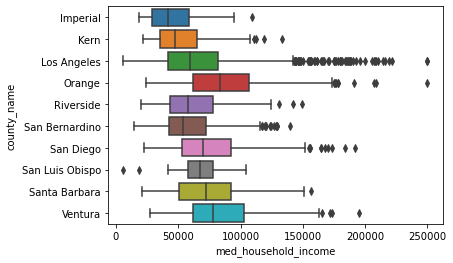

In [8]:
# use seaborn to make a boxplot of median household income per county
ax = sns.boxplot(x=df_sc['med_household_income'], y=df_sc['county_name'])

**What stories does this visualization tell you?**

Next, let's configure and tweak the plot to improve its aesthetics.

In [9]:
# what is this "ax" variable we created?
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [10]:
# every matplotlib axes is associated with a "figure" which is like a container
fig = ax.get_figure()
type(fig)

matplotlib.figure.Figure

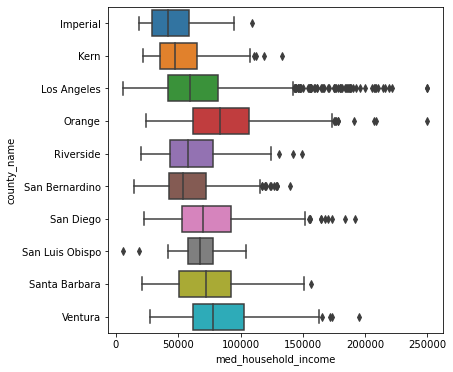

In [11]:
# manually change the plot's size/dimension by adjusting its figure's size
fig = ax.get_figure()
fig.set_size_inches(6, 6) #inches
fig

It's usually better to let seaborn intelligently handle the figure size for you. But you can easily configure its style, plotting context, and many attributes of the plot:

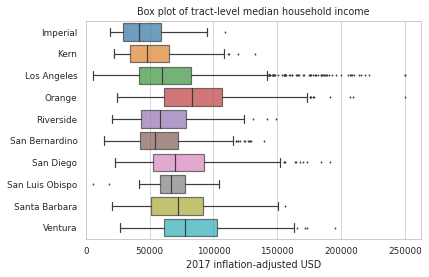

In [12]:
# you can configure seaborn's style
sns.set_style('whitegrid') #visual styles
sns.set_context('paper') #presets for scaling figure element sizes

# fliersize changes the size of the outlier dots
# boxprops lets you set more configs with a dict, such as alpha (which means opacity)
ax = sns.boxplot(x=df_sc['med_household_income'], y=df_sc['county_name'], fliersize=1, boxprops={'alpha':0.7})

# set the x-axis limit, the figure title, and x/y axis labels
ax.set_xlim(left=0)
ax.set_title('Box plot of tract-level median household income')
ax.set_xlabel('2017 inflation-adjusted USD')
ax.set_ylabel('')

# save figure to disk with 600 dpi and a tight bounding box
ax.get_figure().savefig('figure-income-boxplot.png', dpi=600, bbox_inches='tight')

In [13]:
# now it's your turn
# choose a different variable and visualize it as a box plot in each of 3 counties of your choice


### 3b. Histograms and KDE plots

Histograms visualize the distribution of some variable by binning it then counting observations per bin. KDE plots are similar, but continuous and smooth.

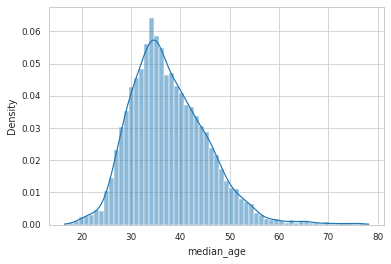

In [14]:
# distplot visualizes the variable's distribution as both histogram and kde
ax = sns.histplot(df['median_age'].dropna(), stat='density', kde=True)

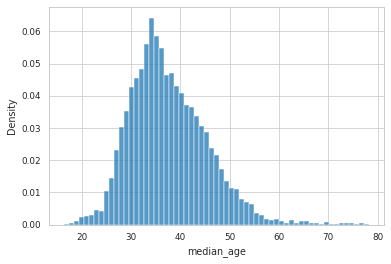

In [15]:
# if you prefer, you can plot just the histogram alone
ax = sns.histplot(df['median_age'].dropna(), stat='density', kde=False)

You can compare multiple histograms to see how different groups overlap or differ by some measure.

In [16]:
# subset the dataframe into majority white and majority hispanic subsets
df_wht = df[df['pct_white'] > 50]
df_hsp = df[df['pct_hispanic'] > 50]

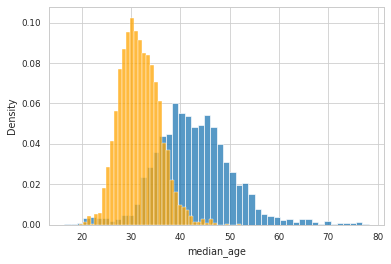

In [17]:
# compare their distributions to each other
ax = sns.histplot(df_wht['median_age'].dropna(), stat='density')
ax = sns.histplot(df_hsp['median_age'].dropna(), stat='density', color='orange')

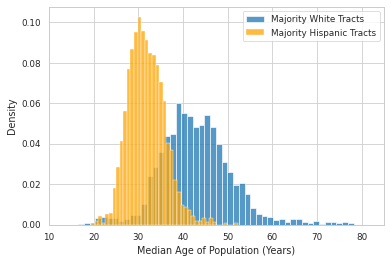

In [18]:
# improve the aesthetics: label each distribution and create a legend
ax = sns.histplot(df_wht['median_age'].dropna(), stat='density', label='Majority White Tracts')
ax = sns.histplot(df_hsp['median_age'].dropna(), stat='density', label='Majority Hispanic Tracts', color='orange')
ax.legend()

# set x-limit, add x-label, then save to disk
ax.set_xlim(10, 85)
ax.set_xlabel('Median Age of Population (Years)')
ax.get_figure().savefig('figure-age-distributions.png', dpi=600, bbox_inches='tight')

**So, what does this plot tell us?**

It looks like the two groups differ... but it is a big enough difference to make meaningful claims about it? We will revisit this question when we discuss statistical significance in a few weeks.

In [19]:
# now it's your turn
# subset the dataframe in a different way (your choice), choose a new variable, and compare its distribution across the subsets
# how do the distributions differ? what does this mean in the real world?


## 4. Pairwise relationships

### 4a. Scatter plots

Histograms and box plots visualize univariate distributions: how a single variable's values are distributed. Scatter plots essentially visualize *bivariate* distributions so that we can see patterns and trends jointly between two variables.

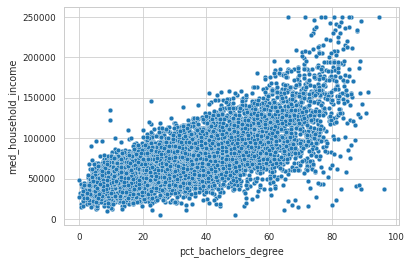

In [20]:
# use seaborn to scatter-plot two variables
ax = sns.scatterplot(x=df['pct_bachelors_degree'], y=df['med_household_income'])

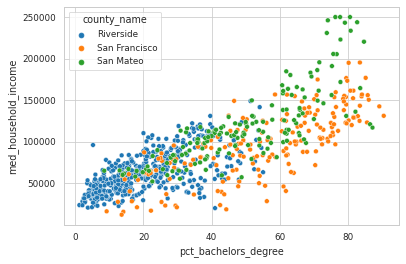

In [21]:
# scatter-plot two variables, broken out across three counties by color
counties = ['Riverside', 'San Mateo', 'San Francisco']
df_counties = df[df['county_name'].isin(counties)]
ax = sns.scatterplot(x=df_counties['pct_bachelors_degree'], y=df_counties['med_household_income'], hue=df_counties['county_name'])

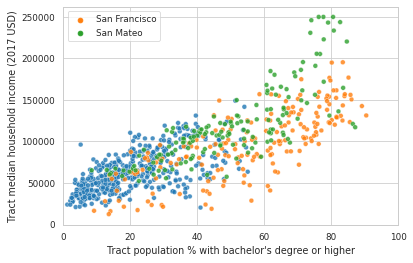

In [22]:
# same thing again, but styled more nicely
counties = ['Riverside', 'San Mateo', 'San Francisco']
df_counties = df[df['county_name'].isin(counties)]
ax = sns.scatterplot(x=df_counties['pct_bachelors_degree'],
                     y=df_counties['med_household_income'],
                     hue=df_counties['county_name'], alpha=0.8)

# remove the column name from the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

# set x/y limits, labels, and save figure
ax.set_xlim(0, 100)
ax.set_ylim(bottom=0)
ax.set_xlabel('Tract population % with bachelor\'s degree or higher')
ax.set_ylabel('Tract median household income (2017 USD)')
ax.get_figure().savefig('figure-income-degree.png', dpi=600, bbox_inches='tight')

In [23]:
# now it's your turn
# pick 2 new variables from the full dataset and scatter plot them against each other
# how do you interpret the pattern? what if you look at only 1 county?


### 4b. Pair plots, correlation heatmaps, and linear trends

In [24]:
# create a subset of SF county tracts, and just 4 variables
df_sf = df[df['county_name'] == 'San Francisco']
df_sf = df_sf[['pct_bachelors_degree', 'med_household_income', 'med_home_value', 'mean_commute_time']]
df_sf.head()

,pct_bachelors_degree,med_household_income,med_home_value,mean_commute_time
GEOID10,,,,
06075012402,61.1,46422.0,704500.0,23.3
06075012401,29.4,23467.0,NaN,25.1
06075012202,34.8,36719.0,977900.0,24.9
06075012201,44.9,56298.0,577600.0,30.3
06075011902,62.3,84735.0,481000.0,29.6


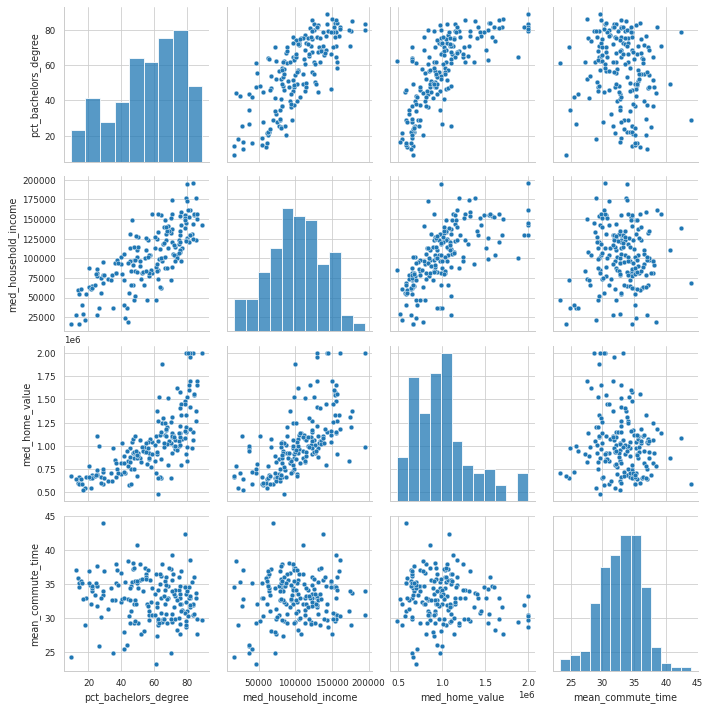

In [25]:
# show a pair plot of these SF tracts across these 4 variables

ax = sns.pairplot(df_sf.dropna())

**Do you see patterns in these scatter plots?**

*Correlation* tells us to what extent two variables are linearly related to one another. Pearson correlation coefficients range from -1 to 1, with 0 indicating no linear relationship, -1 indicating a perfect negative linear relationship, and 1 indicating a perfect positive linear relationship.

In [26]:
# a correlation matrix
correlations = df_sf.corr()
correlations.round(2)

,pct_bachelors_degree,med_household_income,med_home_value,mean_commute_time
pct_bachelors_degree,1.00,0.76,0.72,-0.02
med_household_income,0.76,1.00,0.65,0.20
med_home_value,0.72,0.65,1.00,-0.14
mean_commute_time,-0.02,0.20,-0.14,1.00


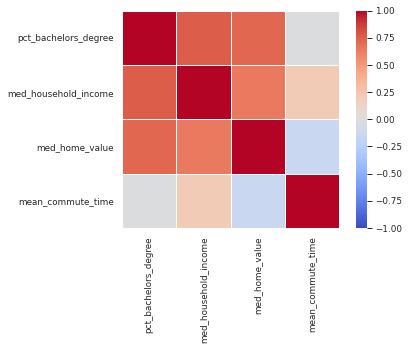

In [27]:
# visual correlation matrix via seaborn heatmap
# use vmin, vmax, center to set colorbar scale properly
ax = sns.heatmap(correlations, vmin=-1, vmax=1, center=0,
                 cmap='coolwarm', square=True, linewidths=1)

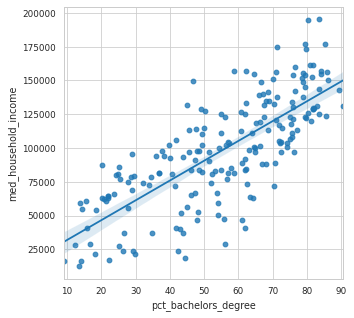

In [28]:
# a linear (regression) trend line + confidence interval
ax = sns.regplot(x=df_sf['pct_bachelors_degree'], y=df_sf['med_household_income'])
ax.get_figure().set_size_inches(5, 5) #make it square

## 5. Bar plots and count plots

Count plots let you count things across categories. Bar plots let you estimate a measure of central tendency across categories.

In [29]:
# pandas value_counts() counts how many times each unique value appears in a column
counts = df_sc['county_name'].value_counts().sort_index()
counts

Imperial             31
Kern                151
Los Angeles        2346
Orange              583
Riverside           453
San Bernardino      369
San Diego           628
San Luis Obispo      54
Santa Barbara        90
Ventura             174
Name: county_name, dtype: int64

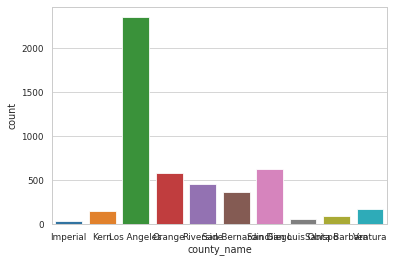

In [30]:
# simple count plot
# essentially a histogram counting observations across categorical data (instead of continuous data)
ax = sns.countplot(x=df_sc['county_name'])

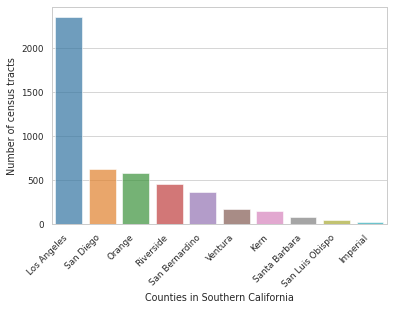

In [31]:
# same thing again, but ordered and styled more nicely
order = df_sc['county_name'].value_counts().index
ax = sns.countplot(x=df_sc['county_name'], order=order, alpha=0.7)

# rotate the tick labels, set x and y axis labels, then save
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel('Counties in Southern California')
ax.set_ylabel('Number of census tracts')
ax.get_figure().savefig('county-tracts-countplot.png', dpi=600, bbox_inches='tight')

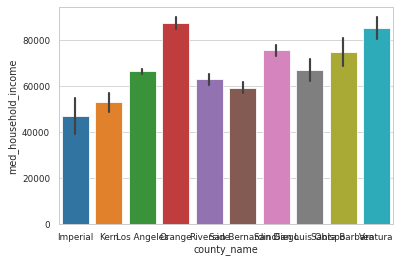

In [32]:
# simple bar plot: estimate means of tract median household income + 95% confidence interval
ax = sns.barplot(x=df_sc['county_name'], y=df_sc['med_household_income'])

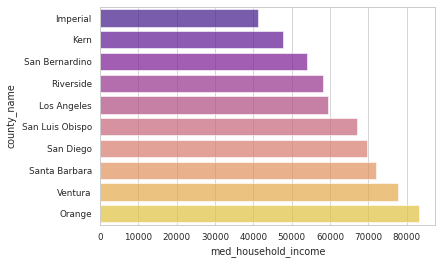

In [33]:
# nicer bar plot sorted by median value
order = df_sc.groupby('county_name')['med_household_income'].median().sort_values().index
ax = sns.barplot(x=df_sc['med_household_income'], y=df_sc['county_name'],
                 estimator=np.median, ci=None, order=order, alpha=0.7, palette='plasma')

How does this compare to a box plot of the same variable?

## 6. Line plots

Line plots are most commonly used to visualize time series: how one or more variables change over time.

In [34]:
# load dataset of country gdp by year
df_gdp = pd.read_csv('../../data/gdp.csv').set_index('year')
df_gdp.shape

(217, 5)

In [35]:
df_gdp.tail()

,GBR,ITA,PER,SWE,USA
year,,,,,
2012,35185,34068,10533,41650,50394
2013,35618,33094,11034,41811,50863
2014,36436,32829,11186,42476,51664
2015,36941,33118,11445,43746,52591
2016,37334,33419,11776,44659,53015


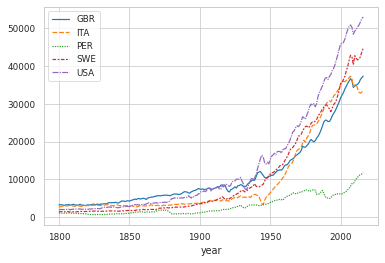

In [36]:
# simple line plot
# seaborn uses the index as x-axis and individual lines for each column
ax = sns.lineplot(data=df_gdp)

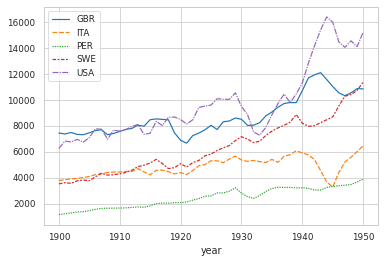

In [37]:
# same thing, but subset to only show 50 years of data (1900-1950)
ax = sns.lineplot(data=df_gdp.loc[1900:1950])

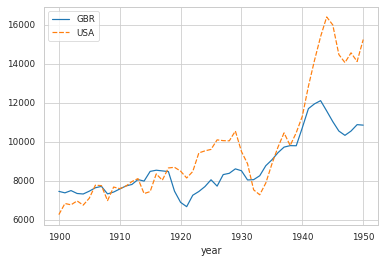

In [38]:
# same thing, but also subset to only show 2 countries
ax = sns.lineplot(data=df_gdp.loc[1900:1950, ['GBR', 'USA']])

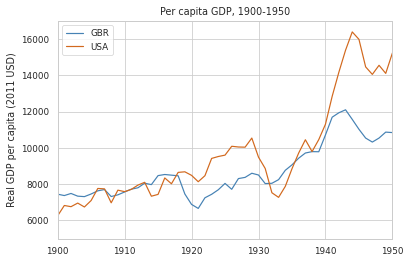

In [39]:
# same thing again, but styled more nicely
ax = sns.lineplot(data=df_gdp.loc[1900:1950, ['GBR', 'USA']],
                  dashes=False, palette=['steelblue', 'chocolate'])

ax.set_xlim(1900, 1950)
ax.set_ylim(5000, 17000)
ax.set_xlabel('')
ax.set_ylabel('Real GDP per capita (2011 USD)')
ax.set_title('Per capita GDP, 1900-1950')
ax.get_figure().savefig('country-gdp-lineplot.png', dpi=600, bbox_inches='tight')

In [40]:
# now it's your turn
# choose any 3 countries from the GDP dataset and visualize them over any 100 year interval in the dataset


## 7. Working with color

Seaborn makes generally smart decisions about color for you. But you can tweak the colors in your plot usually by passing in a `palette` argument (the name of a colormap or a list of colors to use).

How seaborn handles color: https://seaborn.pydata.org/tutorial/color_palettes.html

Available color maps: https://matplotlib.org/tutorials/colors/colormaps.html

Available named colors: https://matplotlib.org/gallery/color/named_colors.html

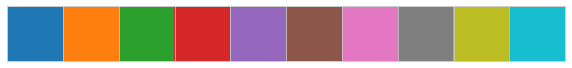

In [41]:
# show the default color palette
sns.palplot(sns.color_palette())

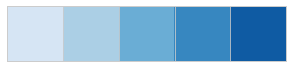

In [42]:
# show the "Blues" color map as a palette
sns.palplot(sns.color_palette('Blues', n_colors=5))

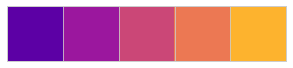

In [43]:
# show the "plasma" color map as a palette
# notice that color map names are case sensitive
sns.palplot(sns.color_palette('plasma', n_colors=5))

In [44]:
# now it's your turn
# go back through a couple of the plots earlier in this notebook and adjust their colors
# try both colormaps and lists of color names: look up both using the links above
